In [70]:
#https://towardsdatascience.com/5-types-of-regression-and-their-properties-c5e1fa12d55e
# Some more regressions examples

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [52]:
df =  pd.read_csv("orange_dataset.csv")
df = df.sort_values(by=['circumference'])

In [53]:
df.shape

(35, 4)

In [54]:
df.columns

Index(['Unnamed: 0', 'Tree', 'age', 'circumference'], dtype='object')

In [55]:
df.describe()

,Unnamed: 0,Tree,age,circumference
count,35.000000,35.00000,35.000000,35.000000
mean,18.000000,3.00000,922.142857,115.857143
std,10.246951,1.43486,491.864528,57.488179
min,1.000000,1.00000,118.000000,30.000000
25%,9.500000,2.00000,484.000000,65.500000
50%,18.000000,3.00000,1004.000000,115.000000
75%,26.500000,4.00000,1372.000000,161.500000
max,35.000000,5.00000,1582.000000,214.000000


In [56]:
df

,Unnamed: 0,Tree,age,circumference
0,1,1,118,30
28,29,5,118,30
14,15,3,118,30
21,22,4,118,32
7,8,2,118,33
29,30,5,484,49
15,16,3,484,51
1,2,1,484,58
22,23,4,484,62
8,9,2,484,69


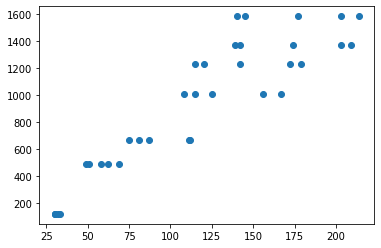

In [57]:
plt.scatter(df["circumference"], df["age"])

In [58]:
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression()

In [59]:
X = df["circumference"].values.reshape(-1,1)
y = df["age"]

In [60]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
model.score(X, y)

0.8345166945883684

In [62]:
y_pred = model.predict(X)

In [63]:
y_pred

array([ 251.08356218,  251.08356218,  251.08356218,  266.71555906,
        274.53155751,  399.58753261,  415.2195295 ,  469.9315186 ,
        501.19551238,  555.90750149,  602.80349215,  649.69948281,
        696.59547348,  860.7314408 ,  884.17943613,  891.99543457,
        915.44342991,  915.44342991,  954.52342212,  993.60341434,
       1103.02739256, 1110.843391  , 1126.47538789, 1126.47538789,
       1149.92338322, 1235.8993661 , 1321.87534899, 1360.95534121,
       1376.58733809, 1400.03533342, 1415.66733031, 1603.25129297,
       1603.25129297, 1650.14728363, 1689.22727585])

In [64]:
y_true = y

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

38891.623015437115

In [66]:
X

array([[ 30],
       [ 30],
       [ 30],
       [ 32],
       [ 33],
       [ 49],
       [ 51],
       [ 58],
       [ 62],
       [ 69],
       [ 75],
       [ 81],
       [ 87],
       [108],
       [111],
       [112],
       [115],
       [115],
       [120],
       [125],
       [139],
       [140],
       [142],
       [142],
       [145],
       [156],
       [167],
       [172],
       [174],
       [177],
       [179],
       [203],
       [203],
       [209],
       [214]])

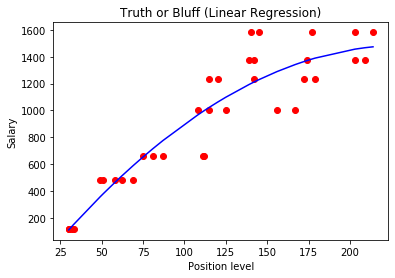

In [67]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [69]:
#from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, pol_reg.predict(poly_reg.fit_transform(X)))

28835.26001925956